## Created on Thr Aug 15 2024

## @author: Jeong-Woon, Park

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load test gene expression dataset (GSE96058; Illumina Hiseq 2000 platform).
# The gene expression values were defined as log2(TPM + 1).
feature = pd.read_csv("GPL11154_Feature.csv", sep = "\t", index_col = "Unnamed: 0").T
feature.head()

,PDE4B,ZSWIM5,GRIK3,TGFBR3,KCND3,PTGER3,NFASC,MAN1C1,EDARADD,TTLL7,...,FBP1,PSAT1,SUSD3,PHYHD1,ZFP37,C9orf152,S1PR3,KIF12,CARD9,AQP3
GSM2528079,2.650557,0.035701,0.479381,0.252898,0.115705,0.258518,0.456144,1.101288,0.583202,0.082636,...,4.148308,4.630803,2.063493,0.177288,0.230799,0.480638,2.437297,0.398622,2.310809,4.442721
GSM2528080,2.698544,1.022129,2.767779,1.962867,4.278629,3.578799,1.274162,2.044027,2.560794,0.891628,...,6.699278,0.925486,7.296986,4.010431,0.881886,3.507277,4.910254,3.046630,1.715555,5.483616
GSM2528081,3.502951,0.140784,1.618721,2.907778,0.020427,1.773200,0.160616,0.795301,1.697125,0.783622,...,2.970655,3.050555,4.318832,0.869362,0.504024,0.793362,2.471336,2.062647,0.328934,0.711312
GSM2528082,1.382623,0.337324,0.823099,1.509357,0.397459,0.315072,0.489176,0.842009,2.089747,0.282154,...,4.055836,0.434329,3.612581,1.511258,0.141666,1.937877,2.532128,2.762338,0.294457,3.300901
GSM2528084,3.309234,0.389789,0.527745,2.155497,0.586573,2.431463,3.313381,1.851547,1.424149,0.987295,...,2.567753,4.286017,1.482676,2.152288,0.902615,0.379425,2.702785,0.572351,1.819702,2.161229


In [3]:
# Load test PAM50 dataset (GSE96058; Illumina Hiseq 2000 platform).
target = pd.read_csv("GPL11154_PAM50.csv", sep = "\t", index_col = "geo_accession")
target.head()

,BRCA_Subtype_PAM50
geo_accession,
GSM2528079,Basal
GSM2528080,LumA
GSM2528081,LumB
GSM2528082,LumA
GSM2528084,Basal


### Split gene expression and metadata into training and test dataset, respectively

In [4]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, 
                                                    stratify = target, random_state = 42)
print("Feature shape for train :", X_train.shape)
print("Target shape for train :", y_train.shape)
print("Feature shape for test :", X_test.shape)
print("Target shape for test :", y_test.shape)

Feature shape for train : (1939, 813)
Target shape for train : (1939, 1)
Feature shape for test : (831, 813)
Target shape for test : (831, 1)


In [5]:
# check whether sample id between feature and target dataset match or not.
print("The number of matched sample id in training :", sum(X_train.index == y_train.index))
print("The number of matched sample id in test :", sum(X_test.index == y_test.index))

The number of matched sample id in training : 1939
The number of matched sample id in test : 831


In [6]:
# Z-score normalization on TPM-level data
# https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-021-02936-w
train_median = np.median(X_train, axis = 0)
train_std = np.std(X_train, axis = 0)

X_train_scale = (X_train - train_median) / train_std
X_test_scale = (X_test - train_median) / train_std

X_train = pd.DataFrame(X_train_scale, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, index = X_test.index, columns = X_test.columns)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PDE4B'),
  Text(1, 0, 'ZSWIM5'),
  Text(2, 0, 'GRIK3'),
  Text(3, 0, 'TGFBR3'),
  Text(4, 0, 'KCND3'),
  Text(5, 0, 'PTGER3'),
  Text(6, 0, 'NFASC'),
  Text(7, 0, 'MAN1C1'),
  Text(8, 0, 'EDARADD'),
  Text(9, 0, 'TTLL7')])

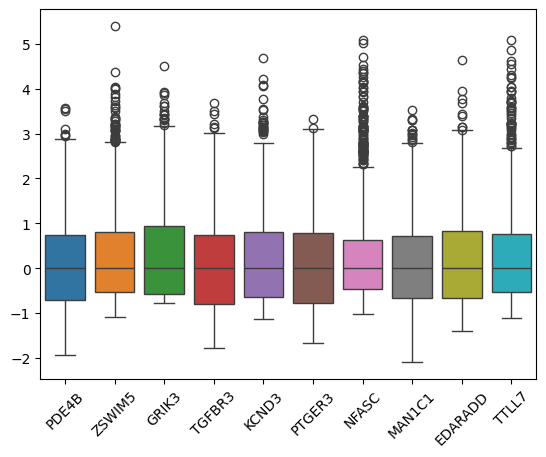

In [7]:
# Feature distritubion after normalization (Train)
plt.rcdefaults()
sns.boxplot(X_train.iloc[:, 0:10])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PDE4B'),
  Text(1, 0, 'ZSWIM5'),
  Text(2, 0, 'GRIK3'),
  Text(3, 0, 'TGFBR3'),
  Text(4, 0, 'KCND3'),
  Text(5, 0, 'PTGER3'),
  Text(6, 0, 'NFASC'),
  Text(7, 0, 'MAN1C1'),
  Text(8, 0, 'EDARADD'),
  Text(9, 0, 'TTLL7')])

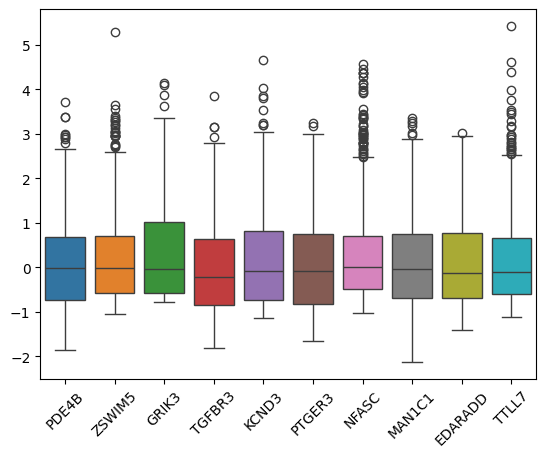

In [8]:
# Feature distritubion after normalization (Test)
plt.rcdefaults()
sns.boxplot(X_test.iloc[:, 0:10])
plt.xticks(rotation = 45)

In [9]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoder = encoder.transform(y_train)
y_test_encoder = encoder.transform(y_test)

# Create series.
y_train = pd.Series(y_train_encoder, index = y_train.index)
y_test = pd.Series(y_test_encoder, index = y_test.index)

Text(0, 0.5, 'Frequency')

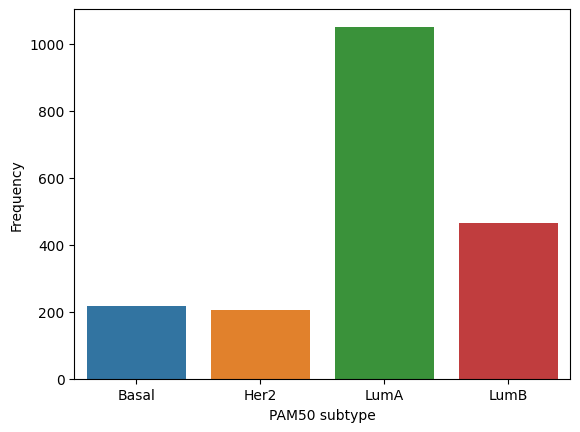

In [10]:
# Check count for each class in the training data.
class_counts = y_train.groupby(y_train).size()
class_counts.index = ["Basal", "Her2", "LumA", "LumB"]
sns.barplot(x = class_counts.index, y = class_counts.values, hue = class_counts.index)
plt.xlabel("PAM50 subtype")
plt.ylabel("Frequency")

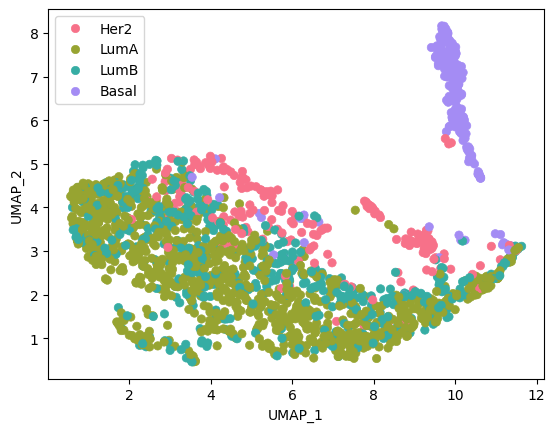

In [11]:
# Initialize UMAP
from umap import UMAP
plt.rcdefaults()

umap_2d = UMAP(n_components = 2, init = "random", random_state = 42)
proj_2d = umap_2d.fit_transform(X_train)
proj_2d = pd.DataFrame(proj_2d, columns = ["UMAP_1", "UMAP_2"])
proj_2d['PAM50'] = encoder.inverse_transform(y_train)

# Plot using seaborn
sns.scatterplot(data = proj_2d, x = 'UMAP_1', y = 'UMAP_2', hue = 'PAM50', edgecolor = None, palette = "husl")
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(loc = 'best')
plt.show()

### Feature selection using shapRFECV

In [12]:
# shapRFECV based on support vector machine.
# https://ieeexplore.ieee.org/document/9585477.
import shap
from sklearn.svm import SVC
from probatus.feature_elimination import ShapRFECV

plt.rcdefaults()
model = SVC(random_state = 42, probability = True, kernel = "linear")
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = 123)

shap_elimination = ShapRFECV(model, step = 0.1, cv = cv, scoring = 'accuracy', n_jobs = -1, random_state = 42, verbose = 0)
report = shap_elimination.fit_compute(X_train, y_train, check_additivity = False)

In [13]:
# Inspect the report generated by ShapRFECV
report

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std
1,813,"[PDE4B, ZSWIM5, GRIK3, TGFBR3, KCND3, PTGER3, ...","[SLC22A4, CCDC125, RGMB, PPP2R2C, SPPL3, GRIK3...",1.000000,0.000000,0.887734,0.020564
2,732,"[PDE4B, ZSWIM5, KCND3, PTGER3, NFASC, MAN1C1, ...","[SCRIB, TRIM58, NRTN, AKR1E2, SETD6, MB21D2, T...",1.000000,0.000000,0.896553,0.019378
3,659,"[PDE4B, ZSWIM5, KCND3, PTGER3, NFASC, MAN1C1, ...","[KLRG2, B3GNTL1, MOGAT2, TACO1, PNKD, SMO, NUM...",1.000000,0.000000,0.907072,0.019344
4,594,"[ZSWIM5, KCND3, PTGER3, NFASC, MAN1C1, EDARADD...","[PPP1R3C, E2F5, HHEX, PTGER3, HS6ST3, LPAR3, Z...",1.000000,0.000000,0.918626,0.020040
5,535,"[ZSWIM5, KCND3, NFASC, EDARADD, TTLL7, CAPN8, ...","[IFI27, SQLE, IL6ST, EEF1A2, HGD, RUNX3, ZNF67...",1.000000,0.000000,0.926357,0.017041
6,482,"[ZSWIM5, KCND3, NFASC, EDARADD, TTLL7, CAPN8, ...","[ZNF662, TM2D2, SOX11, TFB2M, LRRN2, VDAC3, FB...",1.000000,0.000000,0.935226,0.017887
7,434,"[ZSWIM5, KCND3, NFASC, EDARADD, TTLL7, CAPN8, ...","[LMX1B, UCP2, OAS3, NFASC, CARD16, ZER1, SLC46...",1.000000,0.000000,0.941207,0.017221
8,391,"[ZSWIM5, KCND3, TTLL7, CAPN8, LRP8, PHGDH, KMO...","[PLEKHG4B, FGFR3, TFF1, PM20D2, TNFSF10, POC5,...",1.000000,0.000000,0.949668,0.015498
9,352,"[ZSWIM5, KCND3, TTLL7, CAPN8, LRP8, PHGDH, KMO...","[C2CD4D, ZYG11A, KALRN, PTDSS1, CYP4F11, CECR2...",1.000000,0.000000,0.956268,0.014963
10,317,"[ZSWIM5, KCND3, TTLL7, CAPN8, LRP8, PHGDH, KMO...","[ZNF7, PIP, SCGB2A2, GJB5, ZIK1, ZNF329, ACVR1...",1.000000,0.000000,0.960757,0.014260


In [14]:
# Inspect the features, which achive highest accuracy.
keep_gene = shap_elimination.get_reduced_features_set(num_features = 10)
df_keep_gene = pd.DataFrame(keep_gene, columns = ["Gene"])
df_keep_gene.shape

(10, 1)

In [15]:
# Select these features.
X_train = X_train.loc[:, keep_gene]
X_train.head()

,CDH3,ERBB2,TYMS,GREB1,OSR1,MYBL2,FAM83D,ESR1,FOXC1,NAT1
GSM2528830,-0.950804,1.373858,-0.815762,-1.356376,-1.093174,0.258369,-0.112928,-1.740173,-0.888345,-1.169840
GSM2530511,-0.835087,-0.100270,0.498224,0.461720,0.642045,-0.243297,0.026921,0.143596,0.328045,1.009660
GSM2529478,1.034208,0.048535,-0.780848,0.443795,1.860260,-1.154596,-1.012543,-0.059827,0.929136,0.402659
GSM2528452,0.654309,0.951225,-0.435733,0.197814,0.478918,-0.507471,-0.610578,0.730833,0.061014,1.604981
GSM2531266,-0.416042,-0.577657,1.256286,0.851576,-0.044532,0.435536,0.401366,0.989218,-0.091672,-0.537058


In [16]:
# Select these features.
X_test = X_test.loc[:, keep_gene]
X_test.head()

,CDH3,ERBB2,TYMS,GREB1,OSR1,MYBL2,FAM83D,ESR1,FOXC1,NAT1
GSM2530931,-0.274760,0.004436,0.513155,-0.399165,0.095392,0.677217,0.321014,1.095064,0.189007,1.351697
GSM2528314,1.344980,-1.156815,-0.453156,-1.467015,-0.806189,1.084912,1.114391,-2.150182,2.154276,-1.539682
GSM2528222,1.707660,-0.997421,0.464072,-1.627738,-0.495152,1.429975,1.030279,-2.121962,2.556762,-1.547923
GSM2531033,-0.111490,0.171117,0.378999,0.676089,0.578937,-0.566301,-0.453993,-0.737661,-0.013472,0.502547
GSM2529552,-0.686806,2.393517,1.867069,-0.830239,-0.651373,2.107787,1.805055,0.330358,-0.505014,0.822713


In [17]:
# Save train dataset
X_train.to_csv("X_train_feature_select.csv", sep = "\t")

In [18]:
# Save test dataset
X_test.to_csv("X_test_feature_select.csv", sep = "\t")

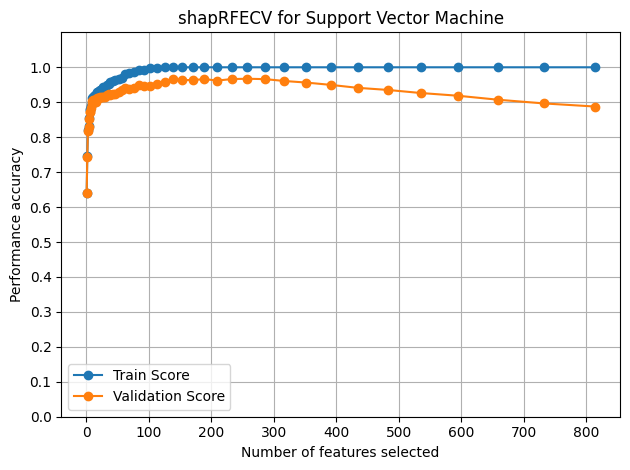

In [19]:
# Visualization
num_features = report["num_features"]
train_metric_mean = report["train_metric_mean"]
val_metric_mean = report["val_metric_mean"]

plt.plot(num_features, train_metric_mean, marker="o", linestyle='-')
plt.plot(num_features, val_metric_mean, marker="o", linestyle='-')

plt.xlabel("Number of features selected")
plt.ylabel("Performance accuracy")
plt.title("shapRFECV for Support Vector Machine")
plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)

plt.legend(["Train Score", "Validation Score"], loc = 'best') 
plt.tight_layout()
plt.show()

### Z-score Normalization on external dataset

In [20]:
# Load test gene expression dataset (GSE81538).
# The gene expression values were defined as log2(TPM + 1).
GSE81538_feature = pd.read_csv("GSE81538_Feature.csv", sep = "\t", index_col = "Unnamed: 0").T
GSE81538_feature_scale = (GSE81538_feature - train_median) / train_std
GSE81538_feature = pd.DataFrame(GSE81538_feature_scale, index = GSE81538_feature.index, columns = GSE81538_feature.columns)

In [21]:
# Load test gene expression dataset (GSE135298).
# The gene expression values were defined as log2(TPM + 1).
GSE135298_feature = pd.read_csv("GSE135298_Feature.csv", sep = "\t", index_col = "Unnamed: 0").T
GSE135298_feature_scale = (GSE135298_feature - train_median) / train_std
GSE135298_feature = pd.DataFrame(GSE135298_feature_scale, index = GSE135298_feature.index, columns = GSE135298_feature.columns)

In [22]:
# Load test gene expression dataset (GPL18573).
# The gene expression values were defined as log2(TPM + 1).
GPL18573_feature = pd.read_csv("GPL18573_Feature.csv", sep = "\t", index_col = "Unnamed: 0").T
GPL18573_feature_scale = (GPL18573_feature - train_median) / train_std
GPL18573_feature = pd.DataFrame(GPL18573_feature_scale, index = GPL18573_feature.index, columns = GPL18573_feature.columns)

In [23]:
# Save dataset.
GSE81538_feature.to_csv("GSE81538_feature_scale.csv", sep = "\t")
GSE135298_feature.to_csv("GSE135298_feature_scale.csv", sep = "\t")
GPL18573_feature.to_csv("GPL18573_feature_scale.csv", sep = "\t")